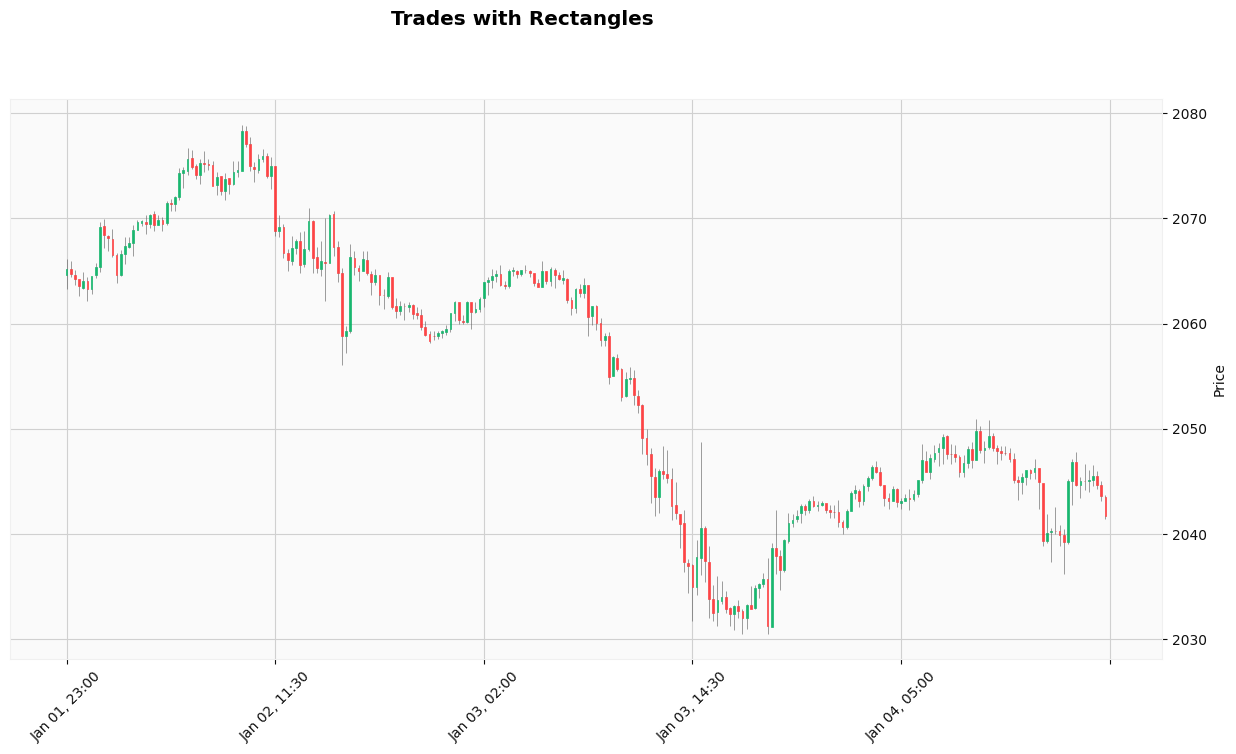

In [1]:
import pandas as pd
import mplfinance as mpf
import matplotlib.patches as patches
import matplotlib.dates as mdates

# Load OHLC data
ohlc = pd.read_csv("applyiedMacd-1.csv", parse_dates=["DateTime"])
ohlc.set_index("DateTime", inplace=True)
ohlc_limited = ohlc.iloc[:250]

# Load trades data
trades = pd.read_csv("bt.result.csv", parse_dates=["Entry Time", "Exit Time"])

# Plot candlestick chart and get axis
fig, axlist = mpf.plot(
    ohlc_limited,
    type='candle',
    style='yahoo',
    figsize=(16,8),
    title="Trades with Rectangles",
    returnfig=True
)
ax = axlist[0]

# Draw rectangles for each trade
for _, trade in trades.iterrows():
    x0 = mdates.date2num(trade['Entry Time'])
    x1 = mdates.date2num(trade['Exit Time'])
    y0 = min(trade['SL'], trade['TP'])
    height = abs(trade['TP'] - trade['SL'])

    rect = patches.Rectangle(
        (x0, y0),
        x1 - x0,
        height,
        linewidth=1.5,
        edgecolor='blue',  # simple single color
        facecolor='none',  # hollow rectangle
        linestyle='-',
        zorder=5
    )
    ax.add_patch(rect)

mpf.show()
